Reference from: [Logistic Regression for Image Classification](https://medium.com/swlh/logistic-regression-for-image-classification-e15d0ae59ce9)

# Imports and data reading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
# Note: place archive folder with datasets in the same directory as this notebook file
df_train = pd.read_csv('./archive/fashion-mnist_train.csv')
df_test = pd.read_csv('./archive/fashion-mnist_test.csv')

y_train = df_train['label']
X_train = df_train.iloc[:, 1:]
X_train_scaled = X_train / 255.0
y_test = df_test['label']
X_test = df_test.iloc[:, 1:]
X_test_scaled = X_test / 255.0

In [3]:
# Manually enter the meaningful name of each label
label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Using the raw images

## Logistic regression (without dimensionality reduction)

### Logistic Regression

In [4]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled, y_train)

In [5]:
y_pred = clf.predict(X_test_scaled)

In [6]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.82      0.81      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.78      0.76      0.77      1000
       Dress       0.87      0.87      0.87      1000
        Coat       0.78      0.81      0.79      1000
      Sandal       0.93      0.92      0.93      1000
       Shirt       0.65      0.60      0.62      1000
     Sneaker       0.91      0.92      0.91      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.93      0.94      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.85     10000
weighted avg       0.85      0.86      0.85     10000



### Coefficient vectors of each class

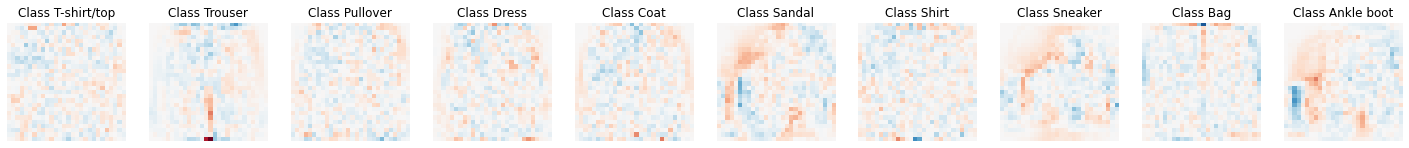

In [7]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(28, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %s' % label[i]);

## Logistic regression with PCA

In [8]:
from sklearn.decomposition import PCA

In [9]:
# Set first 80 principle components; From data exploration phase, we found that first 80 PCs explain about 90% variance
pca = PCA(n_components=80)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
X_train_scaled_pca = pca.fit_transform(X_train_scaled.values)
X_test_scaled_pca = pca.transform(X_test_scaled.values)

### Logistic Regression

In [27]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_scaled_pca, y_train)

In [28]:
y_pred = clf.predict(X_test_scaled_pca)

In [29]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.81      0.81      1000
     Trouser       0.96      0.97      0.97      1000
    Pullover       0.75      0.77      0.76      1000
       Dress       0.84      0.87      0.86      1000
        Coat       0.78      0.79      0.78      1000
      Sandal       0.91      0.92      0.92      1000
       Shirt       0.66      0.58      0.62      1000
     Sneaker       0.91      0.89      0.90      1000
         Bag       0.94      0.94      0.94      1000
  Ankle boot       0.92      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### PCA visualisation of training data

In [30]:
train = pd.DataFrame()

In [31]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

In [32]:
train['First Dimension'] = X_train_scaled_pca[:,0]
train['Second Dimension'] = X_train_scaled_pca[:,1]
train['Third Dimension'] = X_train_scaled_pca[:,2]

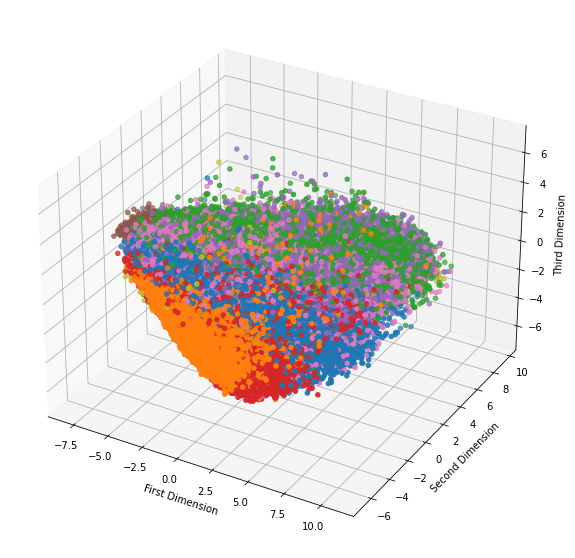

In [33]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=train["First Dimension"], 
    ys=train["Second Dimension"], 
    zs=train["Third Dimension"], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### PCA visualisation of test data

In [34]:
test = pd.DataFrame()

In [35]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

In [36]:
test['First Dimension'] = X_test_scaled_pca[:,0]
test['Second Dimension'] = X_test_scaled_pca[:,1]
test['Third Dimension'] = X_test_scaled_pca[:,2]

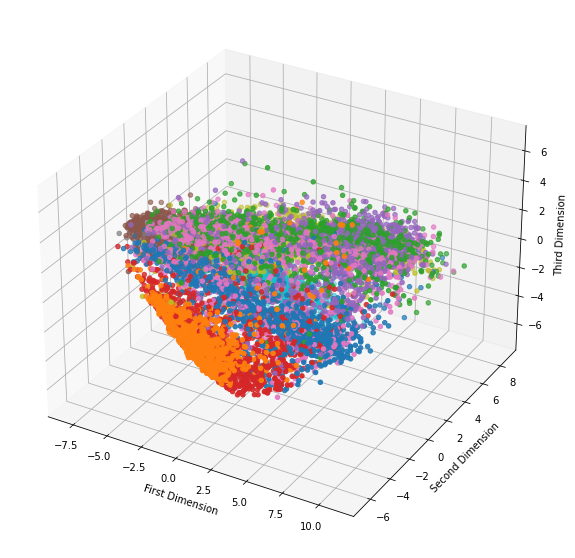

In [37]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=test["First Dimension"], 
    ys=test["Second Dimension"], 
    zs=test["Third Dimension"], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic regression with LDA

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [39]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_scaled_lda = lda.fit_transform(X_train_scaled.values, y_train)
X_test_scaled_lda = lda.transform(X_test_scaled.values)

### Logistic Regression

In [40]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga', 
                         multi_class='multinomial').fit(X_train_scaled_lda, y_train)

In [41]:
y_pred = clf.predict(X_test_scaled_lda)

In [42]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.78      0.79      0.79      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.78      0.70      0.74      1000
       Dress       0.84      0.86      0.85      1000
        Coat       0.74      0.81      0.77      1000
      Sandal       0.88      0.88      0.88      1000
       Shirt       0.63      0.59      0.61      1000
     Sneaker       0.87      0.88      0.88      1000
         Bag       0.92      0.94      0.93      1000
  Ankle boot       0.90      0.91      0.91      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



### LDA visualisation of training data

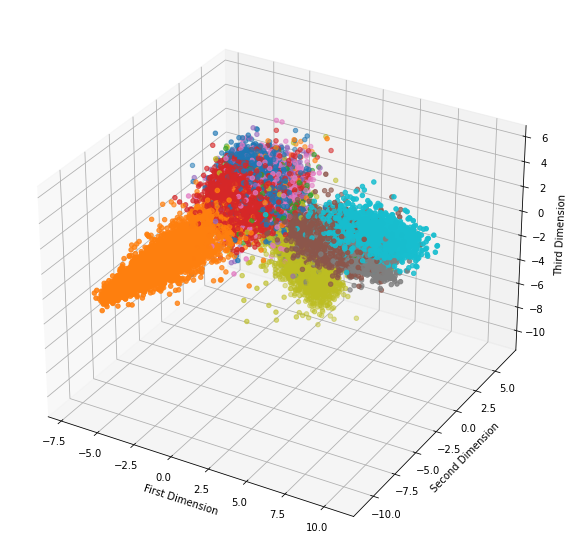

In [43]:
X_train_scaled_lda_df = pd.DataFrame(X_train_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_train_scaled_lda_df[0], 
    ys=X_train_scaled_lda_df[1], 
    zs=X_train_scaled_lda_df[2], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### LDA visualisation of test data

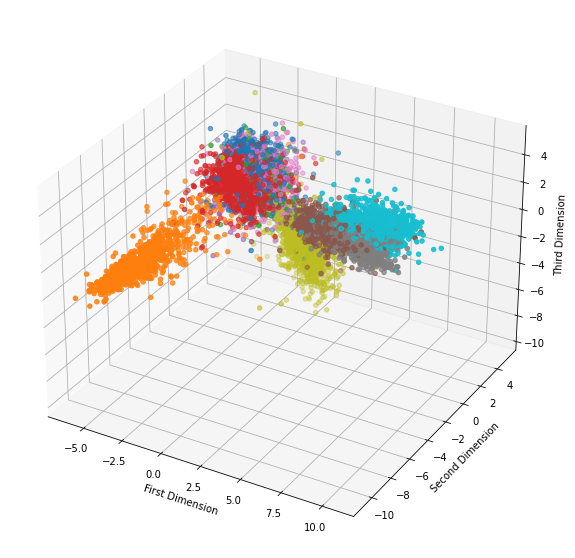

In [44]:
X_test_scaled_lda_df = pd.DataFrame(X_test_scaled_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_test_scaled_lda_df[0], 
    ys=X_test_scaled_lda_df[1], 
    zs=X_test_scaled_lda_df[2], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# Using raw images + image edges (applying edge detection with Canny filter)

In [45]:
from datasets.preprocess.Canny import canny

X_train_cannied, X_test_cannied = canny(X_train_scaled.to_numpy(), X_test_scaled.to_numpy())

## Visualisation of image edges

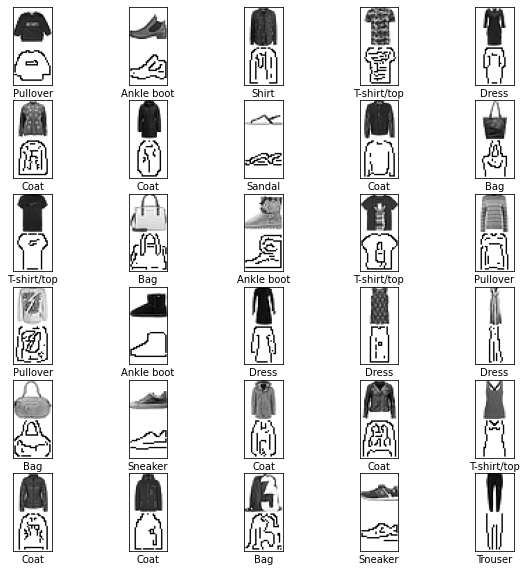

In [46]:
# Set the figure size
plt.figure(figsize=(10,10))
# Show only the first 30 pictures
for i in range(30):
    plt.subplot(6,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_cannied[i].reshape(56,28), cmap=plt.cm.binary)
    plt.xlabel(label[y_train.iloc[i]])

## Logistic regression (without dimensionality reduction)

### Logistic Regression

In [47]:
clf = LogisticRegression(penalty='none',
                         tol=0.01, solver='saga',
                         multi_class='multinomial').fit(X_train_cannied, y_train)

In [48]:
y_pred = clf.predict(X_test_cannied)

In [49]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.82      0.81      1000
     Trouser       0.97      0.98      0.97      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.79      0.83      0.81      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.68      0.64      0.66      1000
     Sneaker       0.90      0.90      0.90      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.92      0.94      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Coefficient vectors of each class

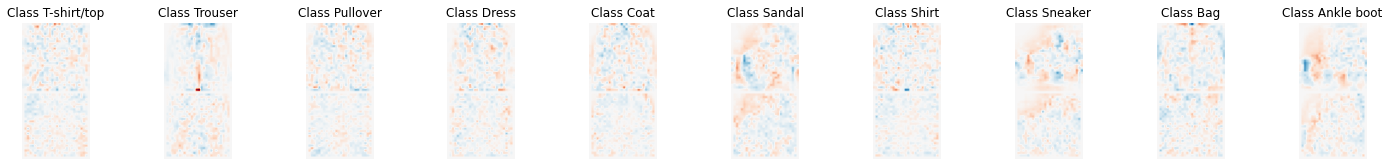

In [50]:
scale = np.max(np.abs(clf.coef_))

p = plt.figure(figsize=(25, 2.5));

for i in range(10):
    p = plt.subplot(1, 10, i + 1)
    p = plt.imshow(clf.coef_[i].reshape(56, 28),
                  cmap=plt.cm.RdBu, vmin=-scale, vmax=scale);
    p = plt.axis('off')
    p = plt.title('Class %s' % label[i]);

## Logistic regression with PCA

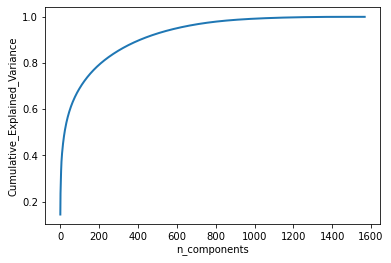

In [51]:
# Initialising the pca
# Set n_components as 1568 dimensions
pca = PCA(n_components = 1568)
# Fit on training data
pca_1568 = pca.fit_transform(X_train_cannied)
# percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
var_ratios = np.cumsum(pca.explained_variance_ratio_)
# Plot the PCA spectrum
plt.figure(figsize=(6, 4))
plt.plot(var_ratios, linewidth=2)
plt.xlabel("n_components")
plt.ylabel("Cumulative_Explained_Variance")
plt.show()

In [52]:
# Set first 400 principle components; From the graph above, we found that first 400 PCs explain about 90% variance
pca = PCA(n_components=400)
# Fit the model with pixel columns and apply the dimensionality reduction on those columns
X_train_cannied_pca = pca.fit_transform(X_train_cannied)
X_test_cannied_pca = pca.transform(X_test_cannied)

### Logistic Regression

In [53]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_cannied_pca, y_train)

In [54]:
y_pred = clf.predict(X_test_cannied_pca)

In [55]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.80      0.82      0.81      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.79      0.77      0.78      1000
       Dress       0.88      0.88      0.88      1000
        Coat       0.78      0.83      0.80      1000
      Sandal       0.93      0.92      0.93      1000
       Shirt       0.65      0.60      0.62      1000
     Sneaker       0.89      0.91      0.90      1000
         Bag       0.96      0.96      0.96      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### PCA visualisation of training data

In [56]:
train = pd.DataFrame()

In [57]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_train.size):
    # Extract the label for comparison
    if y_train[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_train[i] == 1:
        results.append('Trouser')
    elif y_train[i] == 2:
        results.append('Pullover')
    elif y_train[i] == 3:
        results.append('Dress')
    elif y_train[i] == 4:
        results.append('Coat')
    elif y_train[i] == 5:
        results.append('Sandal')
    elif y_train[i] == 6:
        results.append('Shirt')
    elif y_train[i] == 7:
        results.append('Sneaker')
    elif y_train[i] == 8:
        results.append('Bag')
    elif y_train[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_train[i]))

# Create a new column named result which has all meaningful results        
train['result'] = results

In [58]:
train['First Dimension'] = X_train_cannied_pca[:,0]
train['Second Dimension'] = X_train_cannied_pca[:,1]
train['Third Dimension'] = X_train_cannied_pca[:,2]

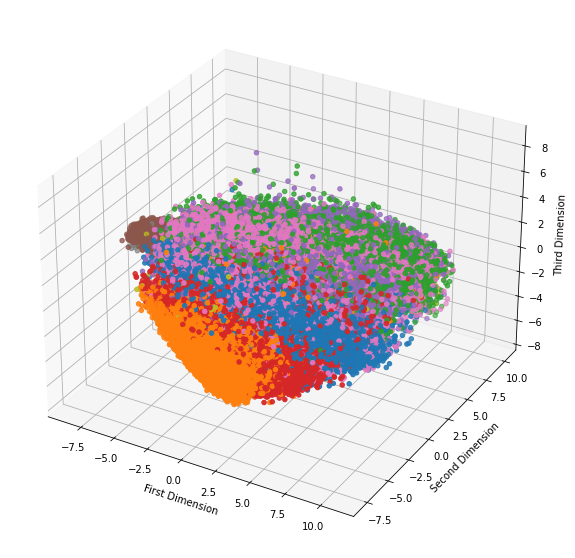

In [59]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=train["First Dimension"], 
    ys=train["Second Dimension"], 
    zs=train["Third Dimension"], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### PCA visualisation of test data

In [60]:
test = pd.DataFrame()

In [61]:
# Create an empty list which will save all meaningful labels
results = []
# Loop through all label
for i in range(y_test.size):
    # Extract the label for comparison
    if y_test[i] == 0:
        # Save meaningful label to the results
        results.append('T-shirt/top')
    # Following the same code pattern as the one above
    elif y_test[i] == 1:
        results.append('Trouser')
    elif y_test[i] == 2:
        results.append('Pullover')
    elif y_test[i] == 3:
        results.append('Dress')
    elif y_test[i] == 4:
        results.append('Coat')
    elif y_test[i] == 5:
        results.append('Sandal')
    elif y_test[i] == 6:
        results.append('Shirt')
    elif y_test[i] == 7:
        results.append('Sneaker')
    elif y_test[i] == 8:
        results.append('Bag')
    elif y_test[i] == 9:
        results.append('Ankle boot')
    else:
        print("The dataset contains an unexpected label {}".format(y_test[i]))

# Create a new column named result which has all meaningful results        
test['result'] = results

In [62]:
test['First Dimension'] = X_test_cannied_pca[:,0]
test['Second Dimension'] = X_test_cannied_pca[:,1]
test['Third Dimension'] = X_test_cannied_pca[:,2]

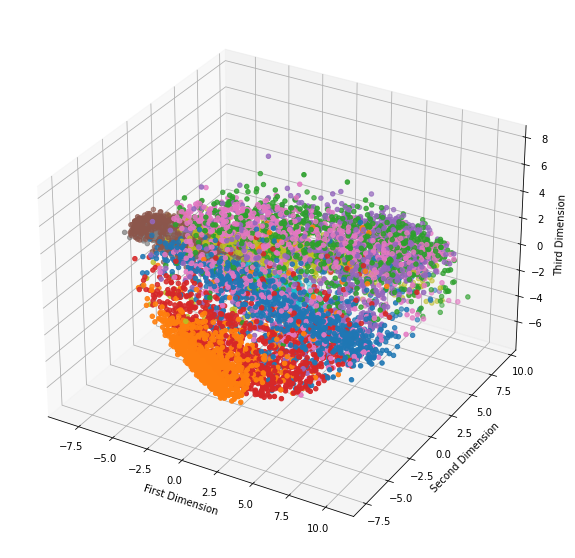

In [63]:
graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=test["First Dimension"], 
    ys=test["Second Dimension"], 
    zs=test["Third Dimension"], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

## Logistic regression with LDA

In [64]:
lda = LinearDiscriminantAnalysis(n_components=9)
X_train_cannied_lda = lda.fit_transform(X_train_cannied, y_train)
X_test_cannied_lda = lda.transform(X_test_cannied)

### Logistic Regression

In [65]:
clf = LogisticRegression(penalty='none',
                         tol=0.1, solver='saga',
                         multi_class='multinomial').fit(X_train_cannied_lda, y_train)

In [66]:
y_pred = clf.predict(X_test_cannied_lda)

In [67]:
print(classification_report(y_test, y_pred, target_names=label))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.80      0.81      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.80      0.77      0.78      1000
       Dress       0.86      0.89      0.87      1000
        Coat       0.78      0.81      0.79      1000
      Sandal       0.94      0.88      0.91      1000
       Shirt       0.65      0.63      0.64      1000
     Sneaker       0.87      0.87      0.87      1000
         Bag       0.95      0.95      0.95      1000
  Ankle boot       0.87      0.94      0.90      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



### LDA visualisation of training data

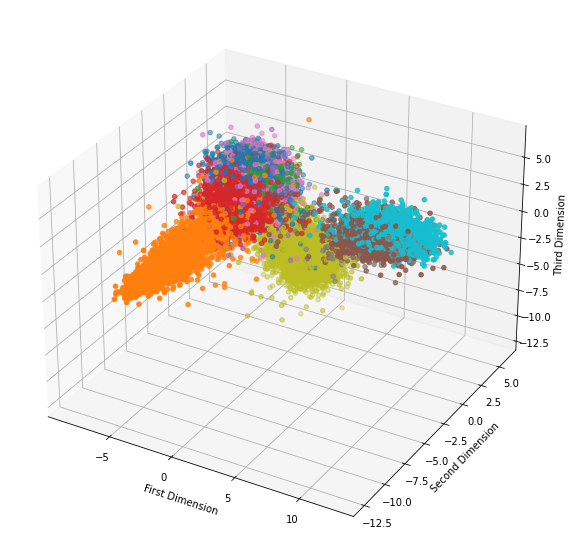

In [68]:
X_train_cannied_lda_df = pd.DataFrame(X_train_cannied_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_train_cannied_lda_df[0], 
    ys=X_train_cannied_lda_df[1], 
    zs=X_train_cannied_lda_df[2], 
    c=y_train, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

### LDA visualisation of test data

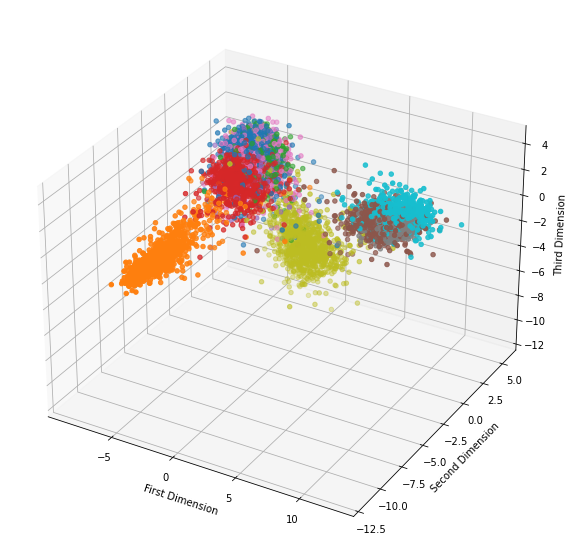

In [69]:
X_test_cannied_lda_df = pd.DataFrame(X_test_cannied_lda)

graph = plt.figure(figsize=(16,10)).gca(projection='3d')
graph.scatter(
    xs=X_test_cannied_lda_df[0], 
    ys=X_test_cannied_lda_df[1], 
    zs=X_test_cannied_lda_df[2], 
    c=y_test, 
    cmap='tab10'
)
graph.set_xlabel('First Dimension')
graph.set_ylabel('Second Dimension')
graph.set_zlabel('Third Dimension')
plt.show()

# Conclusion

From the above tests, the approximate average statistics of the different models are as follows:

<br/>

Using raw images:
|                             | Raw image data | PCA | LDA |
|-----------------------------|----------------|-----|-----|
|**Number of dimensions used**|784             |80   |9    |
|**Accuracy (approx.)**       |86              |85   |83   |
|**Training time (s)**        |150             |2    |0.4  |

<br/>

Using raw images + image edges:
|                             | Raw image data | PCA | LDA |
|-----------------------------|----------------|-----|-----|
|**Number of dimensions used**|1568            |400  |9    |
|**Accuracy (approx.)**       |86              |86   |85   |
|**Training time (s)**        |300             |6    |1    |

<br/>

We observe that the model's highest accuracy is around 86% and is done fastest when the raw images are used (faster training time). However, in the case of using the raw images, running the model takes around 2-3 minutes for training, and we can still achieve decent performance accuracies close to 86% with a significantly lower number of dimensions in a shorter amount of time. Using the first 80 principal components derived from PCA, we can achieve around 83-85% accuracy with around 2s of training. Using just 9 linear discriminants derived from LDA, we can achieve around 82-83% accuracy with around 0.4s of training. (Note that the time taken to get the principal components / linear discriminants was around 8-20 seconds, but even inclusive of this timing, it would still be faster to apply dimensionality reduction and train the model as compared to training on the raw images directly).

We also observe that using the image edges along with the raw images seem to not improve our model accuracy beyond 86%, but it seems to have improved model accuracy when dimensionality reduction is applied (for both PCA and LDA).

This is insightful because in certain applications of our image classifier, if the data has scaled up to contain many more images, we may consider using dimensionality reduction via PCA or LDA to reap the benefits of its much faster training time while sacrificing a little on accuracy. And to reduce the decrease in accuracy expected, we can use the image edges along with the raw images as well before applying dimensionality reduction. Such an approach may be preferred in more time-sensitive applications of the model, such as real-time image classification of a large batch of images.